In [1]:
import maze_prob1 as mz
import numpy as np

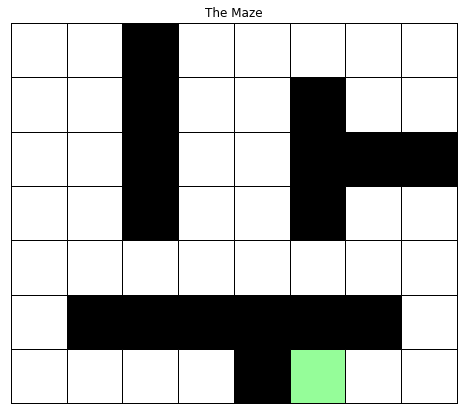

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
mz.draw_maze(maze)

In [18]:
import matplotlib.pyplot as plt
env = mz.Maze(maze)
MC = 1
T = 30
method = 'ValIter';
start  = (0,0,6,5);

gamma = 30/31
epsilon = 1e-6

simulated_paths = []
V, policy = mz.value_iteration(env, gamma, epsilon)





In [19]:
MC = 10000

time_limit = np.random.geometric(1/T, MC)

wins = 0
for t in time_limit:
    path = env.simulate(start, policy, method)
    for current_t in range(t):
        if path[current_t][:2] == (6,5):
            wins+=1
            break
est_prob_win = wins/MC

print("Estimated prob of win given a geometric distribution of T = 30 for 10k runs is: ", est_prob_win)

Estimated prob of win given a geometric distribution of T = 30 for 10k runs is:  0.5264


Simulation number:  0
Simulation number:  100
Simulation number:  200
Simulation number:  300
Simulation number:  400
Simulation number:  500
Simulation number:  600
Simulation number:  700
Simulation number:  800
Simulation number:  900
Simulation number:  1000
Simulation number:  1100
Simulation number:  1200
Simulation number:  1300
Simulation number:  1400
Simulation number:  1500
Simulation number:  1600
Simulation number:  1700
Simulation number:  1800
Simulation number:  1900
Simulation number:  2000
Simulation number:  2100
Simulation number:  2200
Simulation number:  2300
Simulation number:  2400
Simulation number:  2500
Simulation number:  2600
Simulation number:  2700
Simulation number:  2800
Simulation number:  2900
Simulation number:  3000
Simulation number:  3100
Simulation number:  3200
Simulation number:  3300
Simulation number:  3400
Simulation number:  3500
Simulation number:  3600
Simulation number:  3700
Simulation number:  3800
Simulation number:  3900
Simulation n

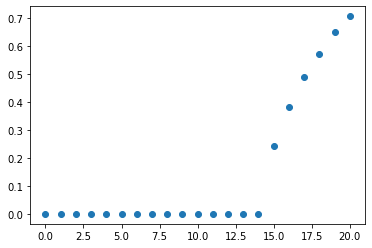

In [3]:
import matplotlib.pyplot as plt
env = mz.Maze(maze)
MC = 10000
T = 20
method = 'DynProg';
start  = (0,0,6,5);
simulated_paths = []
V, policy = mz.dynamic_programming(env, T)

for mc_iter in range(MC):
    simulated_paths.append(env.simulate(start, policy, method))
p_exit = np.zeros(T+1)
for idx, path in enumerate(simulated_paths):
    if idx % 100 == 0:
        print("Simulation number: ", idx)
    for time, state in enumerate(path):
        if state[:2] == (6,5):
            p_exit[time] += 1.0

p_exit_normalized = p_exit/len(simulated_paths)

plt.scatter([t for t in range(len(p_exit_normalized))], p_exit_normalized)


